Team member: Dona Maria

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
# VISUALIZATION 2
csv_directory = '/content/drive/MyDrive/CS418_Project/Fortune500Data/updated_rank_name_symbol'
dataframes = []

# Load data from each CSV file
for year in range(2011, 2024):
    filename = f"/content/drive/MyDrive/CS418_Project/Fortune500Data/updated_rank_name_symbol/rank_name_symbol_{year}.csv"
    df = pd.read_csv(filename)
    dataframes.append(df)

In [3]:
# List to store sector-wise average ranks for each year
sector_performance_by_year = []

for df in dataframes:
    sector_performance = df['Sector'].value_counts()
    sector_performance.index = sector_performance.index.str.title()
    sector_performance_by_year.append(sector_performance)

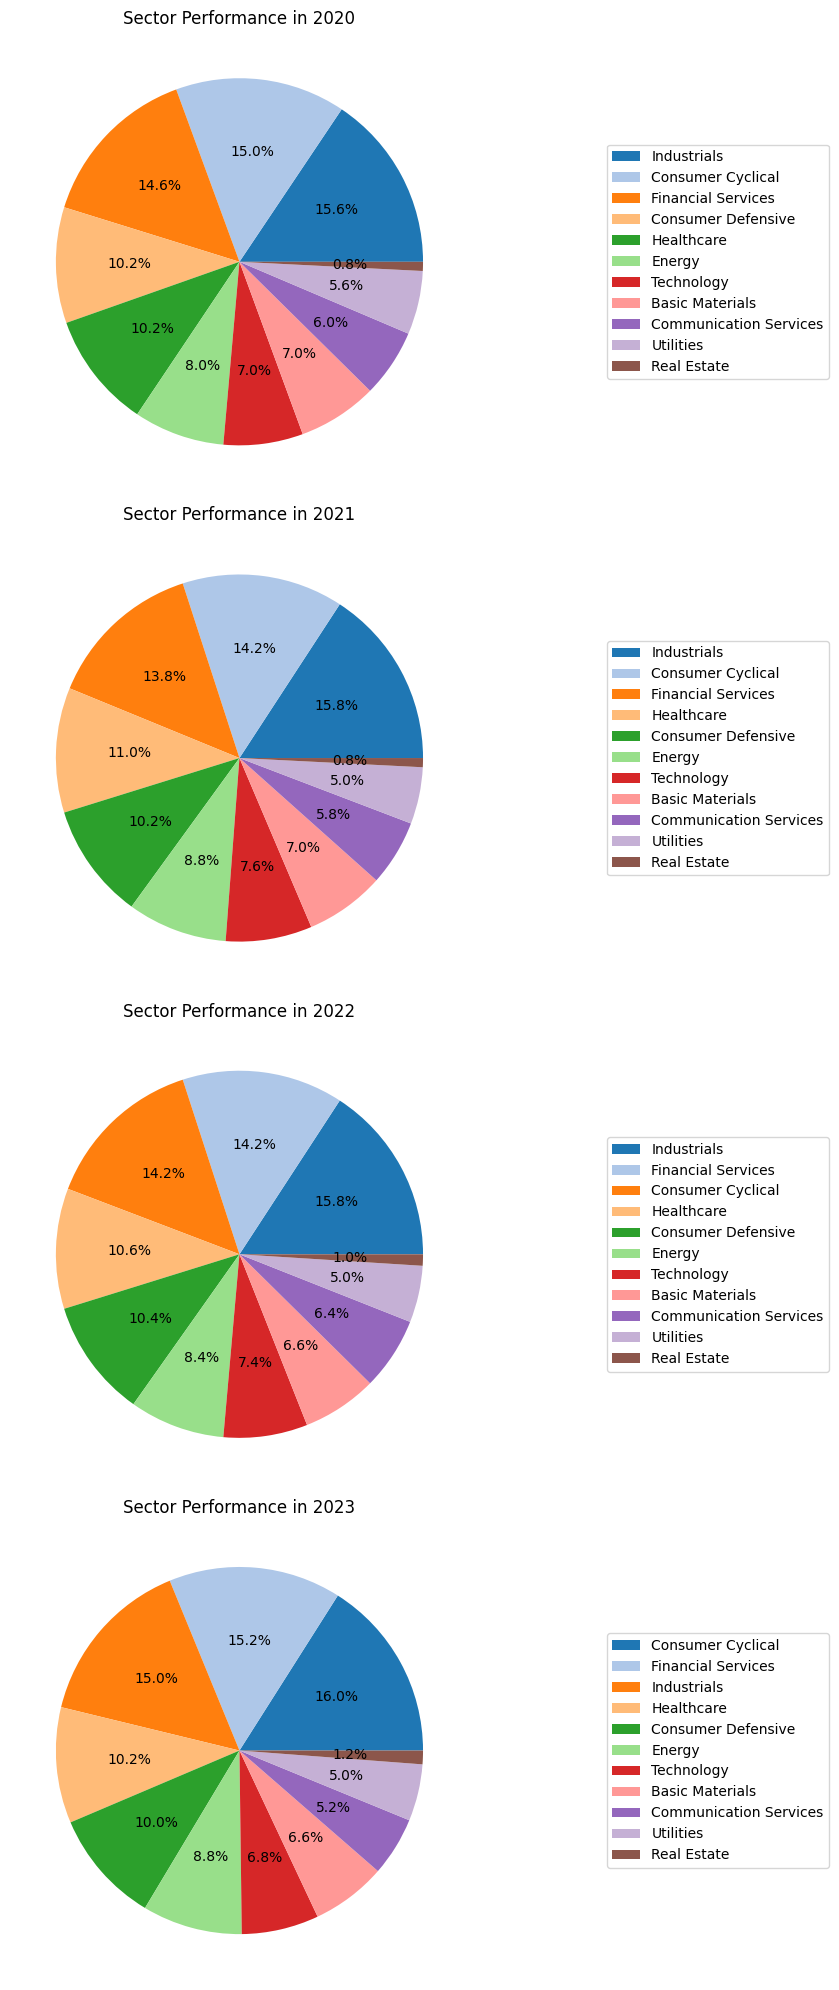

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("tab20", n_colors=11)

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(8, 20))

for i, year in enumerate(range(2020, 2024)):
    sector_performance = sector_performance_by_year[i]
    ax = axs[i]
    patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
    ax.set_title(f'Sector Performance in {year}')
    ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))

plt.tight_layout()
plt.show()

We collected sector information for the years 2020-2023 for the Fortune 500 companies and created pie charts for each year to illustrate the distribution of companies that secured positions on the Fortune 500 list. The trend from 2020 to 2023 reveals a clear pattern: Industrials companies constantly dominates the Fortune 500 rankings and in last year, consumer cyclical companies have grown in prominence. Real estate companies, on the other hand, appear to be struggling, indicating potential difficulties or limitations in the sector. This is interesting as the consistent presence of consumer cyclical companies at the top raises the possibility that these companies excel because of their ability to anticipate and respond to shifting consumer preferences and market conditions. Sectors that struggle to achieve top rankings, such as real estate, might be because of the impact of economic cycles, or shifts in demand on their performance. But, in the last two years, they are doing comparitively good.

In [5]:
# VISUALIZATION 9
# Read CSV files into DataFrames
folder_path = '/content/drive/MyDrive/CS418_Project/data/Data_wStocks/'
data_2020 = pd.read_csv(folder_path + 'rank_name_symbol_2020.csv')
data_2021 = pd.read_csv(folder_path + 'rank_name_symbol_2021.csv')
data_2022 = pd.read_csv(folder_path + 'rank_name_symbol_2022.csv')
data_2023 = pd.read_csv(folder_path + 'rank_name_symbol_2023.csv')

In [6]:
# Clearn the data
data_2020.loc[:, 'm1-o':'gdp-12'] = data_2020.loc[:, 'm1-o':'gdp-12'].astype(float)
data_2021.loc[:, 'm1-o':'gdp-12'] = data_2021.loc[:, 'm1-o':'gdp-12'].astype(float)
data_2022.loc[:, 'm1-o':'gdp-12'] = data_2022.loc[:, 'm1-o':'gdp-12'].astype(float)
data_2023.loc[:, 'm1-o':'gdp-12'] = data_2023.loc[:, 'm1-o':'gdp-12'].astype(float)

# Remove commas from the 'Revenue' column
data_2020['Revenue'] = data_2020.loc[:,'Revenue'].str.replace(',', '')
data_2021['Revenue'] = data_2021.loc[:,'Revenue'].str.replace(',', '')
data_2022['Revenue'] = data_2022.loc[:,'Revenue'].str.replace(',', '')
data_2023['Revenue'] = data_2023.loc[:,'Revenue'].str.replace(',', '')

# Remove $ from the 'Revenue' column
data_2020['Revenue'] = data_2020.loc[:,'Revenue'].str.replace('$', '')
data_2021['Revenue'] = data_2021.loc[:,'Revenue'].str.replace('$', '')
data_2022['Revenue'] = data_2022.loc[:,'Revenue'].str.replace('$', '')
data_2023['Revenue'] = data_2023.loc[:,'Revenue'].str.replace('$', '')

# Convert the 'Revenue' column to float
data_2020['Revenue'] = data_2020.loc[:,'Revenue'].astype(float)
data_2021['Revenue'] = data_2021.loc[:,'Revenue'].astype(float)
data_2022['Revenue'] = data_2022.loc[:,'Revenue'].astype(float)
data_2023['Revenue'] = data_2023.loc[:,'Revenue'].astype(float)

# Remove commas from the 'Profit' column
data_2020['Profit'] = data_2020.loc[:,'Profit'].str.replace(',', '')
data_2021['Profit'] = data_2021.loc[:,'Profit'].str.replace(',', '')
data_2022['Profit'] = data_2022.loc[:,'Profit'].str.replace(',', '')
data_2023['Profit'] = data_2023.loc[:,'Profit'].str.replace(',', '')

# Remove $ from the 'Profit' column
data_2020['Profit'] = data_2020.loc[:,'Profit'].str.replace('$', '')
data_2021['Profit'] = data_2021.loc[:,'Profit'].str.replace('$', '')
data_2022['Profit'] = data_2022.loc[:,'Profit'].str.replace('$', '')
data_2023['Profit'] = data_2023.loc[:,'Profit'].str.replace('$', '')

# Remove () from the 'Profit' column
data_2020['Profit'] = data_2020.loc[:,'Profit'].str.replace(')', '')
data_2021['Profit'] = data_2021.loc[:,'Profit'].str.replace(')', '')
data_2022['Profit'] = data_2022.loc[:,'Profit'].str.replace(')', '')
data_2023['Profit'] = data_2023.loc[:,'Profit'].str.replace(')', '')
data_2020['Profit'] = data_2020.loc[:,'Profit'].str.replace('(', '')
data_2021['Profit'] = data_2021.loc[:,'Profit'].str.replace('(', '')
data_2022['Profit'] = data_2022.loc[:,'Profit'].str.replace('(', '')
data_2023['Profit'] = data_2023.loc[:,'Profit'].str.replace('(', '')

# Convert the 'Profit' column to float
data_2020['Profit'] = data_2020.loc[:,'Profit'].astype(float)
data_2021['Profit'] = data_2021.loc[:,'Profit'].astype(float)
data_2022['Profit'] = data_2022.loc[:,'Profit'].astype(float)
data_2023['Profit'] = data_2023.loc[:,'Profit'].astype(float)

In [7]:
# Add a 'Year' column to each DataFrame
data_2020['Year'] = 2020
data_2021['Year'] = 2021
data_2022['Year'] = 2022
data_2023['Year'] = 2023

# Remove the null values
data_2020_cleaned = data_2020.dropna()
data_2021_cleaned = data_2021.dropna()
data_2022_cleaned = data_2022.dropna()
data_2023_cleaned = data_2023.dropna()

In [8]:
df_combined = pd.concat([data_2020_cleaned, data_2021_cleaned, data_2022_cleaned, data_2023_cleaned], ignore_index=True)
df_temp = df_combined

In [9]:
grouped_by_sector_year = df_combined.groupby(['Sector', 'Year'])

In [10]:
# # Get the columns for stock price on monthly bases
monthly_columns = ['gdp-1', 'gdp-2', 'gdp-3', 'gdp-4', 'gdp-5', 'gdp-6', 'gdp-7', 'gdp-8', 'gdp-9', 'gdp-10', 'gdp-11', 'gdp-12']

In [11]:
df_combined['mean_gdp'] = df_combined[monthly_columns].mean(axis=1).round(2)

In [12]:
print(df_combined)

      Rank                       Name Ticker              Sector  \
0        1                    Walmart    WMT  Consumer Defensive   
1        2                 Amazon.com   AMZN   Consumer Cyclical   
2        3                Exxon Mobil    XOM              Energy   
3        4                      Apple   AAPL          Technology   
4        5                 CVS Health    CVS          Healthcare   
...    ...                        ...    ...                 ...   
1765   496                        KKR    KKR  Financial Services   
1766   497                    Equinix   EQIX         Real Estate   
1767   498            Sonoco Products    SON   Consumer Cyclical   
1768   499                 ServiceNow    NOW          Technology   
1769   500  Robert Half International    RHI         Industrials   

                            Industry   Revenue   Profit    m1-o      m1-c  \
0                    Discount Stores  523964.0  14881.0   39.62   38.1633   
1                    Internet

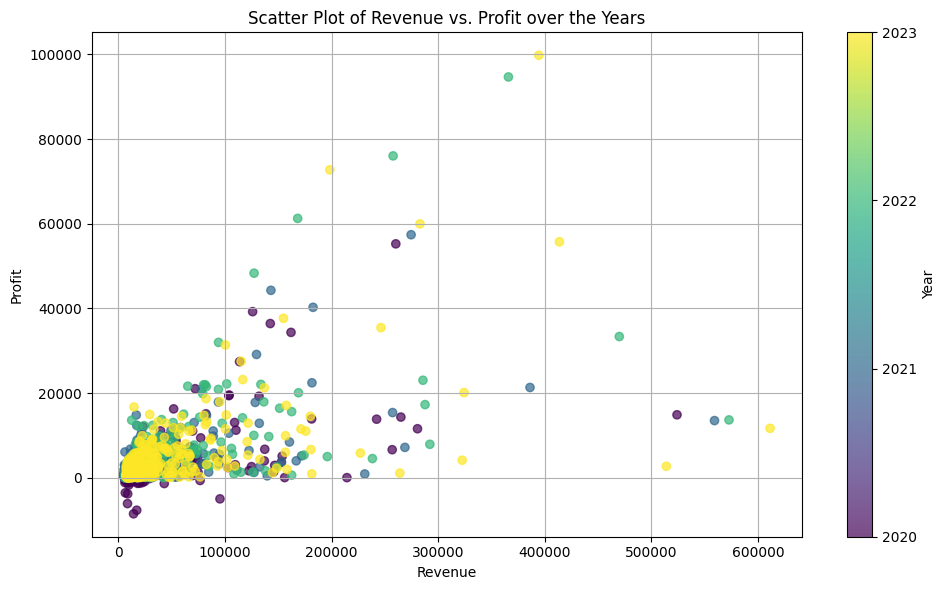

In [13]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# colormap for different years
colors = df_combined['Year']

scatter = plt.scatter(df_combined['Revenue'], df_combined['Profit'], c=colors, cmap='viridis', alpha=0.7)

cbar = plt.colorbar(scatter, label='Year')
cbar.set_ticks([2020, 2021, 2022, 2023])  # Remove ticks from colorbar

plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.title('Scatter Plot of Revenue vs. Profit over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()


This is a scatter plot graphing revenue versus profit over the years 2020 to 2023. The horizontal axis represents revenue, while the vertical axis represents profit. Each dot on the graph corresponds to a data point, and the color of the dot indicates the year, with a color gradient ranging from dark purple for 2020 to yellow-green for 2023, shown in the legend on the right side of the graph. The distribution of dots suggests variability in both revenue and profit across the years. The concentration of dots near the origin implies that a substantial number of data points had relatively low revenue and profit. There are fewer dots as the revenue and profit values increase, indicating that fewer entities achieved higher revenue and profit. The plot does not show a clear trend between revenue and profit over the specified years. There are outliers which signifies that there are companies with unusually high or low revenue and profit compared to others in the dataset.








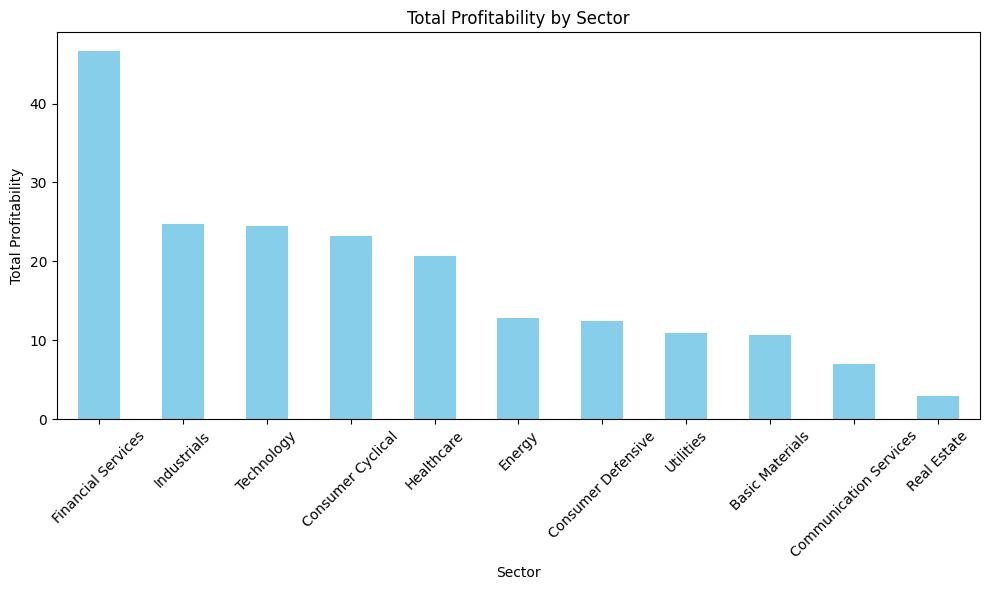

In [14]:
# VISUALIZATION 12
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = df_temp

# Calculate profitability (profit/revenue) for each company
data['Profitability'] = data['Profit'] / data['Revenue']

# Group data by sector and sum up profitability within each sector
sector_profitability = data.groupby('Sector')['Profitability'].sum().sort_values(ascending=False)

# Plot the aggregated profitability by sector
plt.figure(figsize=(10, 6))
sector_profitability.plot(kind='bar', color='skyblue')
plt.xlabel('Sector')
plt.ylabel('Total Profitability')
plt.title('Total Profitability by Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart provides a visual representation of the total profitability of companies across various sectors. Each bar corresponds to a specific sector, with the sectors arranged in descending order based on their total profitability. The tallest bar, representing the "Financial Services" sector, this indicates that companies within this sector collectively exhibit the highest level of profitability among all sectors analyzed. These companies are more effecient as they are generating a higher percentage of profit for each dollar of input expended. Following closely behind is the "Industrials" sector, showing a substantial but slightly lower level of profitability.
The "Real Estate" sector, represented by the shortest bar, signifies the sector with the least total profitability among the sectors examined. This visualization offers valuable insights into the relative performance of different sectors in terms of profitability, allowing stakeholders to identify sectors that are thriving financially and those that may require attention or strategic interventions to enhance profitability.